In [1]:
import os
os.getcwd()

'/Users/sugakubunka/Documents/umezaki/pyML'

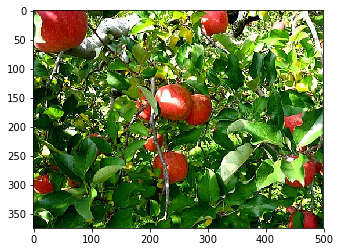

In [7]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt

data_dir = "/Users/sugakubunka/Documents/umezaki/bunka/pythonML/image/"
img = load_img(data_dir + 'apple/0001.jpg')
plt.imshow(img)
plt.show()

In [8]:
import os
labels = os.listdir(data_dir)[1:]
labels

['apple', 'grape', 'lemon', 'melon', 'orange', 'strawberry', 'tomato']

In [9]:
img = []
y = []
for d in range(len(labels)):
    for f in os.listdir(data_dir + labels[d]):
        if f[-1] == 'g':
            img.append(img_to_array(load_img(data_dir + labels[d] + '/' + f,
                                             target_size=(100,100)))/255)
            y.append(d)
        
import numpy as np
X = np.array(img)

In [10]:
X.shape

(721, 100, 100, 3)

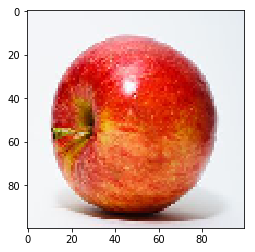

In [11]:
plt.imshow(array_to_img(X[30,:,:,:]))
plt.show()

試しにロジスティック回帰してみる

In [12]:
from sklearn.model_selection import train_test_split

X_tr = X.reshape(X.shape[0],-1)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y,
                                                    random_state=42,
                                                    test_size=0.1)

In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
clf.score(X_test, y_test)

0.73972602739726023

次にCNNを試してみる

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
__________

In [16]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=0.1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
648/648 [==============================] - 20s - loss: 1.9068 - acc: 0.2423    
Epoch 2/10
648/648 [==============================] - 20s - loss: 1.3395 - acc: 0.4367    
Epoch 3/10
648/648 [==============================] - 20s - loss: 1.1419 - acc: 0.5679    
Epoch 4/10
648/648 [==============================] - 20s - loss: 0.9695 - acc: 0.6404    
Epoch 5/10
648/648 [==============================] - 21s - loss: 0.7738 - acc: 0.7099    
Epoch 6/10
648/648 [==============================] - 24s - loss: 0.6816 - acc: 0.7423    
Epoch 7/10
648/648 [==============================] - 24s - loss: 0.7655 - acc: 0.7145    
Epoch 8/10
648/648 [==============================] - 24s - loss: 0.6061 - acc: 0.7963    
Epoch 9/10
648/648 [==============================] - 23s - loss: 0.5266 - acc: 0.8102    
Epoch 10/10
648/648 [==============================] - 23s - loss: 0.5624 - acc: 0.8117    


In [18]:
model.evaluate(X_test, y_test)

73/73 [==============================] - 1s     


[0.53098534762042837, 0.78082191862472117]

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(7, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 32)        0         
__________

In [21]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

epochs = 10
batch_size = 10

    # Fit the model on the batches generated by datagen.flow().
history = model2.fit_generator(datagen.flow(X_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs)

Epoch 1/10
64/64 [==============================] - 24s - loss: 1.7557 - acc: 0.2719    
Epoch 2/10
64/64 [==============================] - 24s - loss: 1.4595 - acc: 0.3363    
Epoch 3/10
64/64 [==============================] - 23s - loss: 1.1479 - acc: 0.5367    
Epoch 4/10
64/64 [==============================] - 23s - loss: 0.9459 - acc: 0.6227    
Epoch 5/10
64/64 [==============================] - 23s - loss: 0.9304 - acc: 0.6680    
Epoch 6/10
64/64 [==============================] - 23s - loss: 0.8515 - acc: 0.6859    
Epoch 7/10
64/64 [==============================] - 23s - loss: 0.7439 - acc: 0.7383    
Epoch 8/10
64/64 [==============================] - 23s - loss: 0.7304 - acc: 0.7285    
Epoch 9/10
64/64 [==============================] - 23s - loss: 0.8206 - acc: 0.7086    
Epoch 10/10
64/64 [==============================] - 23s - loss: 0.7773 - acc: 0.6863    


In [22]:
model2.evaluate(X_test, y_test)

73/73 [==============================] - 1s     


[0.79595608825552955, 0.65753424902484836]

In [32]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Dropout, Flatten, Dense
from keras.models import Sequential

input_tensor = Input(shape=(100, 100, 3))
model = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

for layer in model.layers:
    layer.trainable = False
    
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(7, activation='softmax'))

new_model = Sequential()
for l in model.layers:
    new_model.add(l)

new_model.add(top_model)

new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [33]:
new_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [34]:
epochs = 10
batch_size = 20

history = new_model.fit_generator(datagen.flow(X_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs)

Epoch 1/10
32/32 [==============================] - 92s - loss: 1.6441 - acc: 0.4203    
Epoch 2/10
32/32 [==============================] - 89s - loss: 0.8777 - acc: 0.6859    
Epoch 3/10
32/32 [==============================] - 89s - loss: 0.7330 - acc: 0.7375    
Epoch 4/10
32/32 [==============================] - 89s - loss: 0.6843 - acc: 0.7594    
Epoch 5/10
32/32 [==============================] - 89s - loss: 0.5167 - acc: 0.8117    
Epoch 6/10
32/32 [==============================] - 89s - loss: 0.4875 - acc: 0.8297    
Epoch 7/10
32/32 [==============================] - 89s - loss: 0.4225 - acc: 0.8556    
Epoch 8/10
32/32 [==============================] - 93s - loss: 0.3878 - acc: 0.8648    
Epoch 9/10
32/32 [==============================] - 99s - loss: 0.3546 - acc: 0.8796    
Epoch 10/10
32/32 [==============================] - 93s - loss: 0.3133 - acc: 0.8930    


In [35]:
new_model.evaluate(X_test, y_test)

73/73 [==============================] - 10s    


[0.70972520276291728, 0.78082191862472117]

In [41]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt

test_dir = "/Users/sugakubunka/Documents/umezaki/bunka/pythonML/test/"
import os
labels = os.listdir(data_dir)[1:]

img = []
y_test = []
for d in range(len(labels)):
    for f in os.listdir(test_dir + labels[d]):
        if f[-1] == 'g':
            img.append(img_to_array(load_img(test_dir + labels[d] + '/' + f,
                                             target_size=(100,100)))/255)
            y_test.append(d)
        
import numpy as np
X_test = np.array(img)

In [43]:
y_test = to_categorical(y_test)
new_model.evaluate(X_test, y_test)

84/84 [==============================] - 11s    


[0.82139313220977783, 0.76190476190476186]